In [1]:
# Setup stuff
#### There are different ways to do portfolios:
#### - continuous choice, always adjust
#### - discrete choice, always adjust
#### - discrete choice, sometimes adjust
####
#### Wrt distrbutions you can either have a generic discrete probability
#### distribution, or you can have a LogNormal distribution. In the former
#### You specify probabilities and values for the returns factor and in
#### the latter you specify RisykAvg and RiskyStd. In the discrete case
#### You also need to input a function that *draws* from the distribution in
#### drawRiskyFunc

### Assumptions: distributions are time constant as well as probability to re-optimize
### If you cannot optimize each period, you *NEED* to specify the PortfolioSet

import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
import HARK.ConsumptionSaving.ConsumerParameters as param
import copy

In [2]:
# Set up the model and its parameters
Avg = 1.08 # equity premium 
Std = 0.15 # standard deviation of rate-of-return shocks

RiskyDstnFunc = cpm.RiskyDstnFactory(RiskyAvg=Avg, RiskyStd=Std) # Generates nodes for integration
RiskyDrawFunc = cpm.LogNormalRiskyDstnDraw(RiskyAvg=Avg, RiskyStd=Std) # Generates draws from the "true" distribution

init_portfolio = copy.copy(param.init_lifecycle)
init_portfolio['approxRiskyDstn'] = RiskyDstnFunc
init_portfolio['drawRiskyFunc']   = RiskyDrawFunc
init_portfolio['RiskyCount']      = 10
init_portfolio['RiskyShareCount'] = 30
init_portfolio['Rfree']           = 1.0
init_portfolio['CRRA']            = 6.0
init_portfolio['aXtraMax']        = 100
init_portfolio['aXtraCount']      = 50
init_portfolio['BoroCnstArt']     = 0.0 # important for theoretical reasons
# init_portfolio['vFuncBool'] = True # We do not need value function for purposes here
pcct = cpm.PortfolioConsumerType(**init_portfolio)

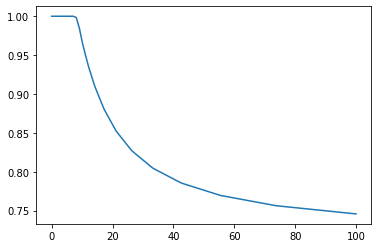

In [3]:
# Solve the model under the given parameters

# Improvements:
# 1. Plot RiskyShareLimitFunc (a constant) along with this
# 2. Make vertical axis go from zero to 1

pcct.solve()
import matplotlib.pyplot as plt
import numpy as np
eevalgrid = np.linspace(0,100,100)
plt.plot(eevalgrid, pcct.solution[6].RiskyShareFunc[0][0](eevalgrid))
plt.show()

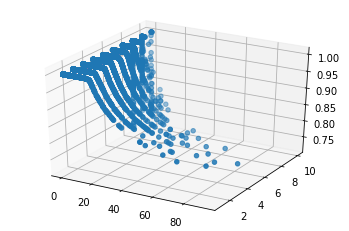

In [4]:
# Simulate 10 years of behavior according to the model

pcct.track_vars = ['aNrmNow', 't_age', 'RiskyShareNow']
pcct.T_sim = 10
pcct.initializeSim()
pcct.simulate()
pcct.RiskyShareNow_hist

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcct.aNrmNow_hist, pcct.t_age_hist, pcct.RiskyShareNow_hist)
plt.show()

In [8]:
# Solve the specialized / simple version for which there is a good approximation
# This is the version for which Campbell and Viceira provide an approximate formula
# assuming log normally distributed shocks

init_lognormportfolio = copy.deepcopy(init_portfolio) # Use same parameter values
# init_lognormportfolio['approxRiskyDstn'] = RiskyDstnFunc
# init_lognormportfolio['drawRiskyFunc']   = RiskyDrawFunc
del init_lognormportfolio['RiskyAvg']
del init_lognormportfolio['RiskyShr']
lnpcct = cpm.LogNormalPortfolioConsumerType(**init_lognormportfolio)

lnpcct.solve()

eevalgrid = np.linspace(0,100,100)
plt.plot(eevalgrid, lnpcct.solution[6].RiskyShareFunc[0][0](eevalgrid))
plt.show()

AttributeError: 'LogNormalPortfolioConsumerType' object has no attribute 'RiskyAvg'

In [ ]:
# Again simulate a few periods 
lnpcct.track_vars = ['aNrmNow', 't_age', 'RiskyShareNow']
lnpcct.T_sim = 10
lnpcct.initializeSim()
lnpcct.simulate()
lnpcct.RiskyShareNow_hist

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lnpcct.aNrmNow_hist, lnpcct.t_age_hist, lnpcct.RiskyShareNow_hist)
plt.show()

In [ ]:
# 
### Assumptions: distributions are time constant as well as probability to re-optimize
### If you cannot optimize each period, you *NEED* to specify the PortfolioSet

import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
import HARK.ConsumptionSaving.ConsumerParameters as param
import copy

#### random portfolio choice
# First we solve the generic versions
Avg = 1.08
Std = 0.15

RiskyDstnFunc = cpm.RiskyDstnFactory(RiskyAvg=Avg, RiskyStd=Std)
RiskyDrawFunc = cpm.LogNormalRiskyDstnDraw(RiskyAvg=Avg, RiskyStd=Std)

init_portfolio_prb = copy.deepcopy(init_portfolio)
s
init_portfolio_prb['AdjustPrb'] = 1.0
init_portfolio_prb['PortfolioDomain'] = cpm.DiscreteDomain([0.0, 0.5, 0.6, 1.0])
pcct_prb = cpm.PortfolioConsumerType(**init_portfolio_prb)

pcct_prb.solve()

eevalgrid = np.linspace(0,100,100)
plt.plot(eevalgrid, pcct_prb.solution[6].RiskyShareFunc[0][0](eevalgrid))
plt.show()

pcct_prb.track_vars = ['aNrmNow', 't_age', 'RiskyShareNow', 'CantAdjust']
pcct_prb.T_sim = 10
pcct_prb.AgentCount = 30
pcct_prb.initializeSim()
pcct_prb.simulate()
pcct_prb.RiskyShareNow_hist

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcct_prb.aNrmNow_hist, pcct_prb.t_age_hist, pcct_prb.RiskyShareNow_hist)
plt.show()